---
# Игры — Формирование модели монетизации
___


Презентация - https://yadi.sk/d/gt5s3mKngRPbpQ
    
Дашборд - https://public.tableau.com/profile/goze1566#!/vizhome/SpaceBrothers_16001983272200/Dashboard1


## Импорт библиотек
___

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

from scipy import stats as st

## Загрузка данных
___

In [2]:
events = pd.read_csv('events.csv')
ad_costs = pd.read_csv('ad_costs.csv')
user_source = pd.read_csv('user_source.csv')

## Изучение, проверка и первичный анализ данных
___

In [3]:
events

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [5]:
events.duplicated().sum()

1

In [6]:
events.drop_duplicates(inplace = True)

In [7]:
print('Количество реализованных проектов:',events['project_type'].value_counts()[0])

Количество реализованных проектов: 1866


In [8]:
events['event'].value_counts().reset_index()

,index,event
0,building,127956
1,finished_stage_1,5817
2,project,1866


In [9]:
events['building_type'].value_counts().reset_index()

,index,building_type
0,spaceport,59325
1,assembly_shop,54494
2,research_center,14137


In [10]:
print('Количество уникальных пользователей, совершивших хоть одно событие:',len(events['user_id'].unique()))

Количество уникальных пользователей, совершивших хоть одно событие: 13576


In [11]:
events['event_datetime'] = events['event_datetime'].astype('datetime64')

In [12]:
print('Дата первого события:',events['event_datetime'].min())
print('Дата последнего события:',events['event_datetime'].max())

Дата первого события: 2020-05-04 00:00:01
Дата последнего события: 2020-06-05 12:32:49


In [13]:
events['event_datetime'].dt.strftime("%Y-%m-%d").value_counts().head(7).reset_index()

,index,event_datetime
0,2020-05-10,15207
1,2020-05-09,13129
2,2020-05-08,12059
3,2020-05-07,10858
4,2020-05-06,9925
5,2020-05-05,9055
6,2020-05-11,8185


In [14]:
events.query('event_datetime > "2020-05-11"')['event_datetime'].dt.strftime("%Y-%m-%d").value_counts().head(7).reset_index()

,index,event_datetime
0,2020-05-11,8184
1,2020-05-12,7918
2,2020-05-13,7624
3,2020-05-14,6830
4,2020-05-15,5952
5,2020-05-16,5099
6,2020-05-17,3955


---
Аномальных пропусков в датафрейме нет, все они связаны с игровыми условностями. Преобразовал тип данных колонки с датой. Единственный пропуст удалил.

При первом знакомстве с данными, можно сделать такие выводы:
- Количество уникальных пользователей, совершивших хоть одно событие: 13576
- Временные рамки: от 2020-05-04 00:00:01 до 2020-06-05 12:32:49
- Наибольшая активность наблюдается c 5 по 10 мая, это период старта когорты, дальше активность сильно падает
- Всего зданий построенно: 127956
- Завершенно первых уровней: 5817
- Проектов реализованно: 1866
- Распределение по популярности зданий:
    - Космопорт: 59325
    - Сборочный цех: 54494
    - Исследовательский центр: 14137
___

In [15]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [16]:
ad_costs['source'].value_counts().reset_index()

,index,source
0,facebook_ads,7
1,instagram_new_adverts,7
2,yandex_direct,7
3,youtube_channel_reklama,7


In [17]:
ad_costs['day'].value_counts().reset_index()

,index,day
0,2020-05-05,4
1,2020-05-08,4
2,2020-05-09,4
3,2020-05-03,4
4,2020-05-04,4
5,2020-05-06,4
6,2020-05-07,4


In [18]:
pivot_ad = ad_costs.pivot_table(index = 'source', values = 'cost', aggfunc = {'min','max','sum'}).reset_index()

In [19]:
pivot_ad['diff'] = pivot_ad['max'] - pivot_ad['min']
pivot_ad['diff_x'] = pivot_ad['max'] / pivot_ad['min']

In [20]:
pivot_ad

,source,max,min,sum,diff,diff_x
0,facebook_ads,935.882786,38.723350,2140.904643,897.159436,24.168435
1,instagram_new_adverts,943.204717,46.775400,2161.441691,896.429318,20.164546
2,yandex_direct,969.139394,42.779505,2233.111449,926.359889,22.654292
3,youtube_channel_reklama,454.224943,23.314669,1068.119204,430.910274,19.482367


---
Имеем четыре источника трифика, рекламная акция длилась неделю. С каждым днем стоимость кликов уменьшалась для каждого из источников, вплоть до разницы в 22.6 раз. Среди источников выделяется Ютуб, ведь на него было потрачено в 2 раза меньше, чем на любой другой источник.
___

In [21]:
user_source

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [22]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [23]:
len(user_source['user_id'].unique())

13576

In [24]:
user_source.groupby('source').agg({'user_id':'count'}).reset_index().sort_values('user_id', ascending = False)

,source,user_id
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


---
Максимальный прирост получили от Яндекс.Директ, на первый взгляд самымы выгодным источником является Ютуб, а самым бесполезным - Фейсбук
___

## Анализ данных
___

In [25]:
ev_count = events.groupby('user_id').agg({'event':'count'}).reset_index().sort_values('event', ascending = False)

In [26]:
ev_count

,user_id,event
11329,d6aca06a-cd75-4cd8-b8cd-240a3c163884,22
13550,ff841992-d93b-462e-bc6e-18c24a514f36,22
10120,bf542075-e3a2-4e79-82d8-3838e86d2a25,22
3773,45935e5d-8f50-4176-83d3-fd545bb2015f,21
7912,94844e06-0352-4048-9e62-1db7718f804c,21
...,...,...
13417,fcefbdaa-5f8b-49a6-91f3-8c09e0a94a5d,1
9843,b9d266a0-7741-49ba-9125-134c5969f8d1,1
11813,ded24248-15c7-4037-9092-f64fcaa651e7,1
9715,b783fde3-5416-43fb-99b0-2c6e5f787d6f,1


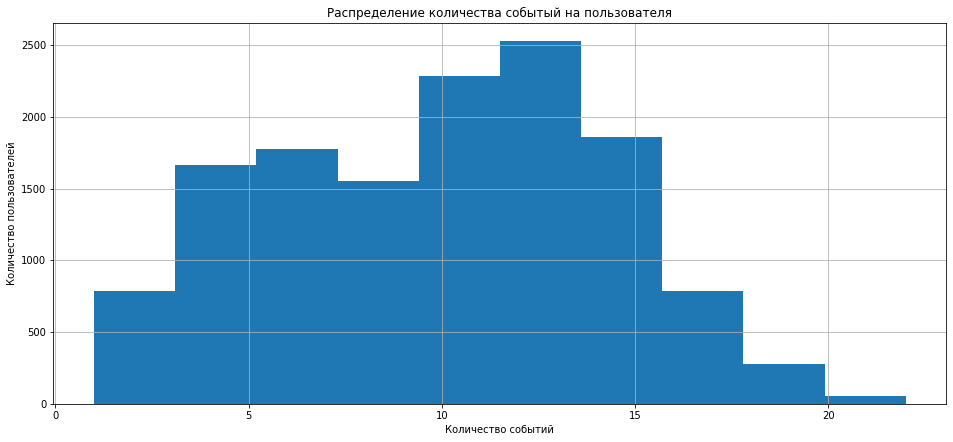

In [27]:
ev_count.hist(figsize=(16,7))
plt.title('Распределение количества событый на пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей');

---
Пользователи совершили от 1 до 22 событий, наибольшее количество пользователей совершило от 10 до 13 событий
___

In [28]:
events['date'] = events['event_datetime'].dt.date

In [29]:
ev_date = events.groupby('date').agg({'event':'count'}).reset_index()

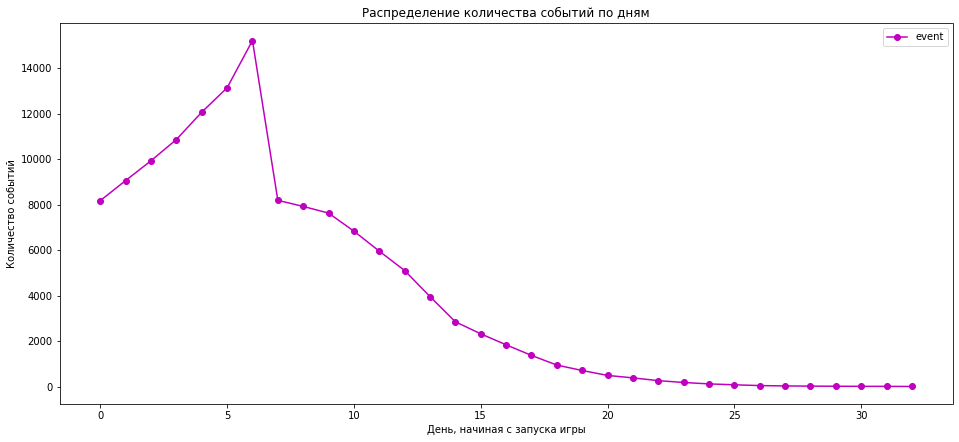

In [30]:
ev_date.plot(style='-o', figsize=(16,7), color = 'm')
plt.title('Распределение количества событий по дням')
plt.ylabel('Количество событий')
plt.xlabel('День, начиная с запуска игры');

---
В первую неделю пользователи активно играют, наблюдается рост количества событий, после идет резкий спад
___

In [31]:
events['building_type'].dropna()

0           assembly_shop
1           assembly_shop
2           assembly_shop
3           assembly_shop
4           assembly_shop
               ...       
135627    research_center
135631    research_center
135634    research_center
135635    research_center
135637    research_center
Name: building_type, Length: 127956, dtype: object

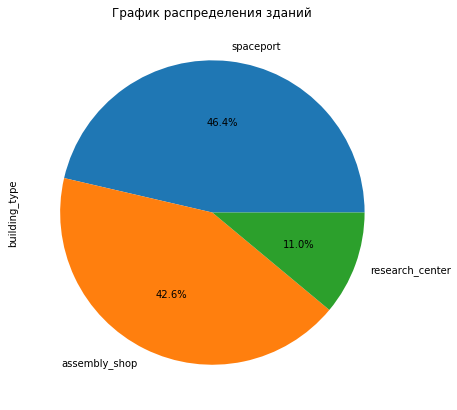

In [32]:
events['building_type'].dropna().value_counts().plot.pie(subplots=True,autopct='%1.1f%%', figsize=(16,7))
plt.title('График распределения зданий')
plt.show()

In [33]:
ev_type = events.groupby('user_id').agg({'event':'nunique'}).reset_index()

In [34]:
ev_1 = ev_type.query('event == 1')['user_id']
ev_2 = ev_type.query('event == 2')['user_id']
ev_3 = ev_type.query('event == 3')['user_id']

not_fin = events.query('user_id in @ev_1').reset_index()
victory = events.query('user_id in @ev_2').reset_index()
project = events.query('user_id in @ev_3').reset_index()

In [35]:
victory.to_csv('victory.csv')
project.to_csv('project.csv')

In [36]:
len(victory['user_id'].unique())

3951

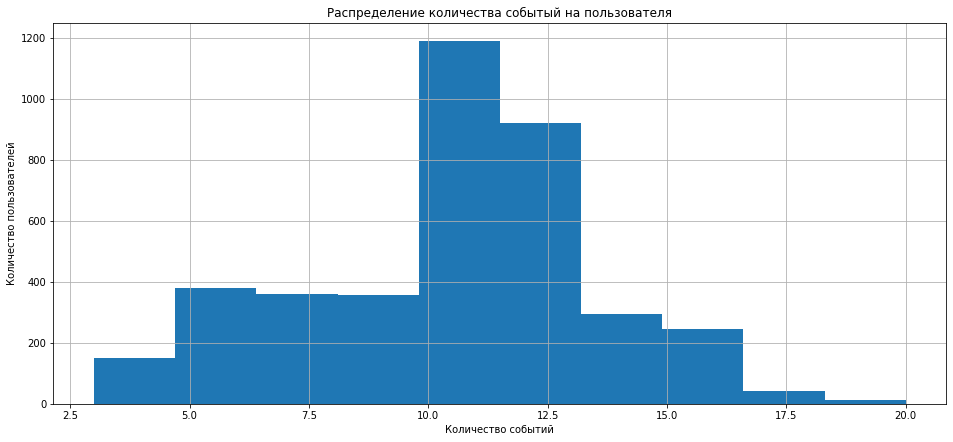

In [37]:
victory.groupby('user_id').agg({'event':'count'}).reset_index().sort_values('event', ascending = False).hist(figsize=(16,7))
plt.title('Распределение количества событый на пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей');

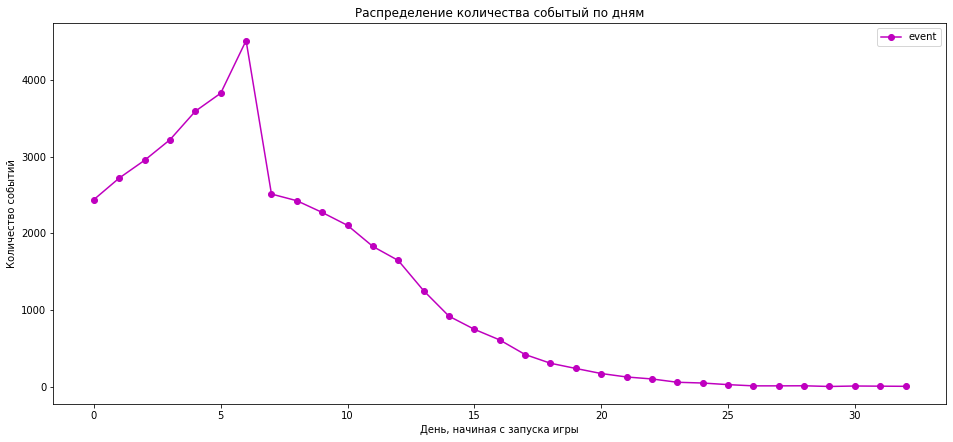

In [38]:
victory.groupby('date').agg({'event':'count'}).reset_index().plot(style='-o', figsize=(16,7), color = 'm')
plt.title('Распределение количества событый по дням')
plt.ylabel('Количество событий')
plt.xlabel('День, начиная с запуска игры');

---
В среднем на пользователя, перешедшего на следующий уровень победой, приходится 10-12 событий, график распределение количества событый по дням повторяет график для всех пользователей.
___

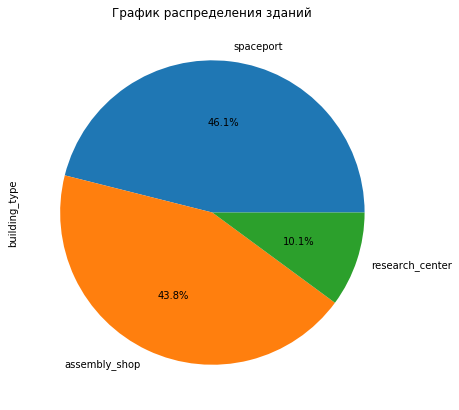

In [39]:
victory['building_type'].dropna().value_counts().plot.pie(subplots=True,autopct='%1.1f%%', figsize=(16,7))
plt.title('График распределения зданий')
plt.show()

---
Распределение схоже с картиной всех пользователей
___

In [40]:
first = victory.groupby(['user_id'])['event_datetime'].min()
first.name = 'first'
victory = victory.join(first, on='user_id')
victory['end_ts'] = pd.to_datetime(victory[victory['event'] == 'finished_stage_1']['event_datetime'])
victory['duration'] = victory['end_ts'] - victory['first']

In [41]:
victory['duration'].describe().reset_index()

,index,duration
0,count,3951
1,mean,11 days 02:30:24.076183
2,std,4 days 02:17:54.287406
3,min,0 days 09:39:01
4,25%,8 days 07:01:19.500000
5,50%,10 days 19:01:37
6,75%,13 days 10:33:17.500000
7,max,30 days 21:58:53


In [42]:
victory['duration'].median()

Timedelta('10 days 19:01:37')

---
- На прохождение уровня пользователи, прошедшие его победой, тратят от 9 часов до 31 дня
- Среднее время прохождения - 11 дней, медиана отличается от среднего на 7 часов(~2.7%)
- Спустя  14 дней 80% пользователей завершили уровень
- Ровно 3951 пользователей выбрали путь сражений, это ~68% от завершивших уровень
___

In [43]:
project

,index,event_datetime,event,building_type,user_id,project_type,date
0,1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
1,8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN,2020-05-04
2,9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN,2020-05-04
3,13,2020-05-04 00:02:56,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN,2020-05-04
4,20,2020-05-04 00:03:46,building,assembly_shop,b374304d-2f74-4cc1-a4e2-500da44a06c7,NaN,2020-05-04
...,...,...,...,...,...,...,...
27328,135620,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN,2020-06-03
27329,135627,2020-06-04 05:18:54,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-06-04
27330,135629,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN,2020-06-04
27331,135630,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly,2020-06-04


In [44]:
len(project['user_id'].unique())

1866

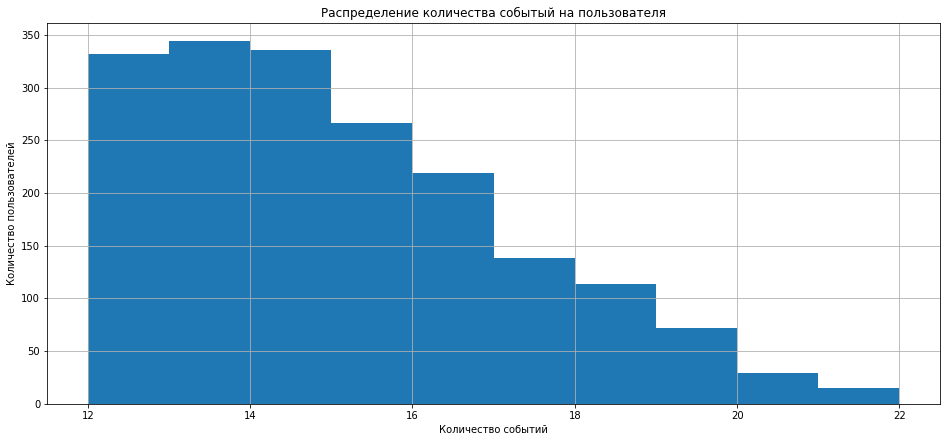

In [45]:
project.groupby('user_id').agg({'event':'count'}).reset_index().sort_values('event', ascending = False).hist(figsize=(16,7))
plt.title('Распределение количества событый на пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей');

---
Пользователи, завершившие уровень проектом, совершают от 12 событий, похоже постройка зданий для них более важна.
___

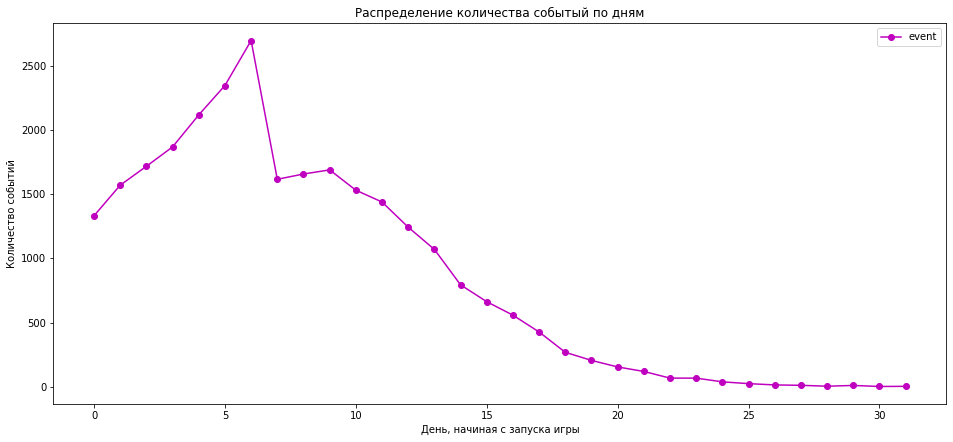

In [46]:
project.groupby('date').agg({'event':'count'}).reset_index().plot(style='-o', figsize=(16,7), color = 'm')
plt.title('Распределение количества событый по дням')
plt.ylabel('Количество событий')
plt.xlabel('День, начиная с запуска игры');

---
Картина мало отличается от альтернативной группы, но тут видно, что пользователи затрачивают чуть больше времени(участок с 7 по 15 день более пологий)
___

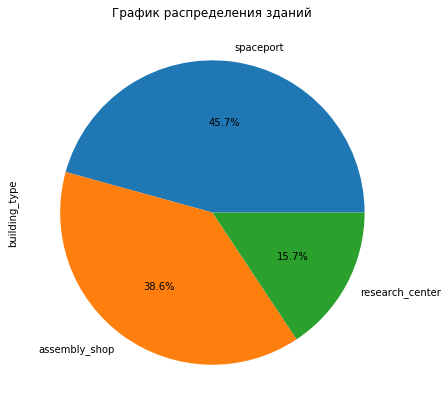

In [47]:
project['building_type'].dropna().value_counts().plot.pie(subplots=True,autopct='%1.1f%%', figsize=(16,7))
plt.title('График распределения зданий')
plt.show()

---
В этой группе пользователи чуть чаще строят центр переработки и реже сборочный цех
___

In [48]:
first = project.groupby(['user_id'])['event_datetime'].min()
first.name = 'first'
project = project.join(first, on='user_id')
project['end_ts'] = pd.to_datetime(project[project['event'] == 'finished_stage_1']['event_datetime'])
project['duration'] = project['end_ts'] - project['first']

In [49]:
project['duration'].describe().reset_index()

,index,duration
0,count,1866
1,mean,13 days 11:00:49.135048
2,std,3 days 12:11:01.977069
3,min,5 days 03:22:27
4,25%,10 days 22:49:58.750000
5,50%,13 days 00:45:41
6,75%,15 days 13:47:23.750000
7,max,29 days 03:13:43


In [50]:
project['duration'].median()

Timedelta('13 days 00:45:41')

---
- На прохождение уровня пользователи, прошедшие его постройкой проекта, тратят от 5 до 29 дней(что сильно отличается от предыдущей группы)
- Среднее время прохождения - 13 дней, медиана отличается от среднего на 11 часов(~3.4%)
- Спустя 15 дней 75% пользователей завершили уровень
- Ровно 1866 пользователей выбрали реализацию проекта, это ~32% от завершивших уровень
___

In [51]:
len(not_fin['user_id'].unique())

7759

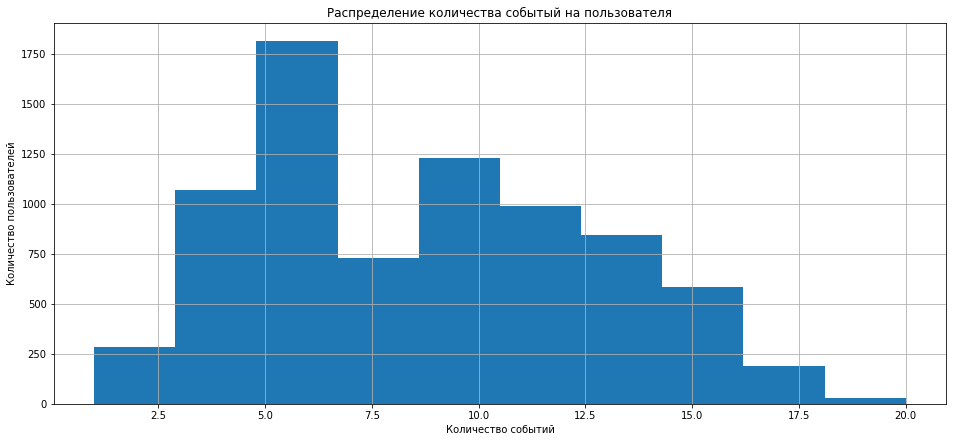

In [52]:
not_fin.groupby('user_id').agg({'event':'count'}).reset_index().sort_values('event', ascending = False).hist(figsize=(16,7))
plt.title('Распределение количества событый на пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей');

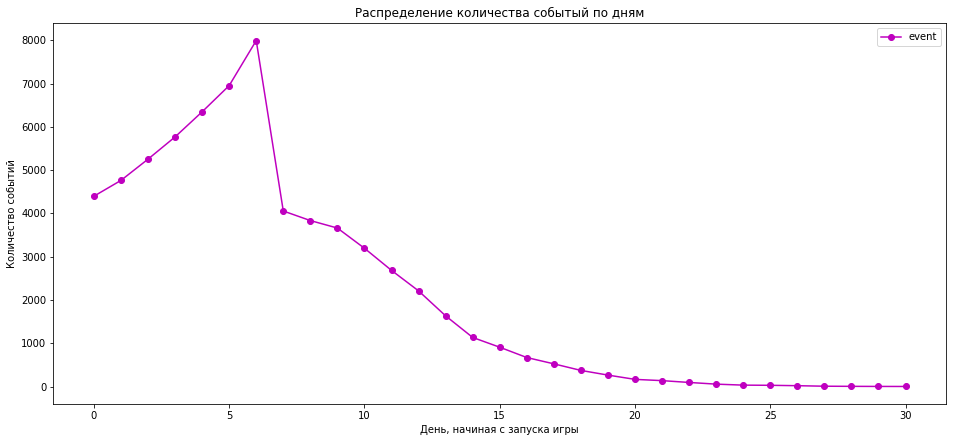

In [53]:
not_fin.groupby('date').agg({'event':'count'}).reset_index().plot(style='-o', figsize=(16,7), color = 'm')
plt.title('Распределение количества событый по дням')
plt.ylabel('Количество событий')
plt.xlabel('День, начиная с запуска игры');

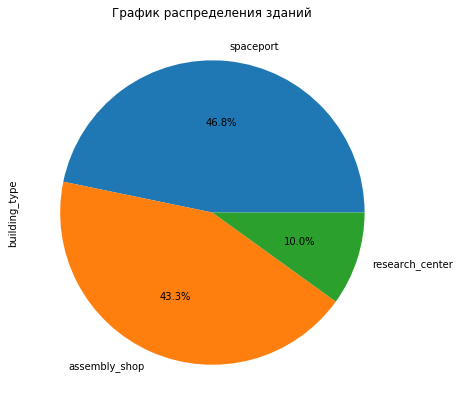

In [54]:
not_fin['building_type'].dropna().value_counts().plot.pie(subplots=True,autopct='%1.1f%%', figsize=(16,7))
plt.title('График распределения зданий')
plt.show()

---
- Ровно 7759 пользователей не завершили проект, это ~57% от всех пользователей.
- Графики схожи, сильно отличается только распределение событий на пользователя
- Большая часть поьлзователей совершает 5-6 событий
___

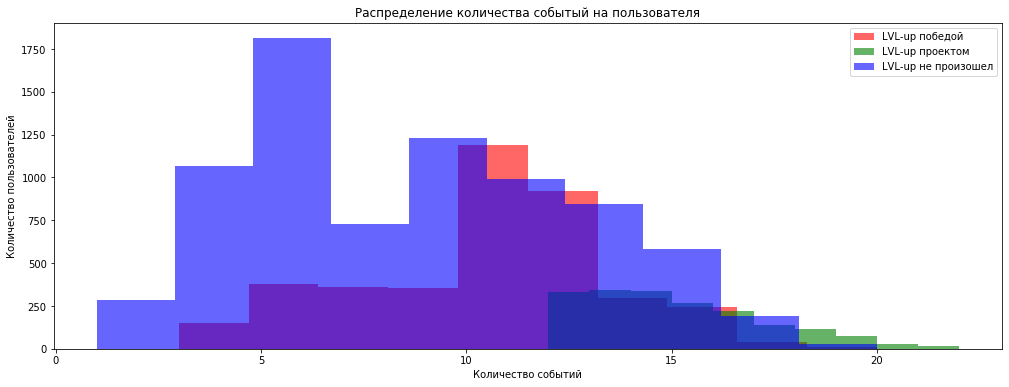

In [55]:
plt.figure(figsize=(17,6))

plt.hist(victory.groupby('user_id')['event'].count(),alpha = 0.6, color = 'red', label = 'LVL-up победой')
plt.hist(project.groupby('user_id')['event'].count(),alpha = 0.6, color = 'green', label = 'LVL-up проектом')
plt.hist(not_fin.groupby('user_id')['event'].count(),alpha = 0.6, color = 'blue', label = 'LVL-up не произошел')

plt.title('Распределение количества событый на пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')

plt.show()

---
- Большинство пользователей не перешли на следующий уровень
- Перешедшие реализацией проекта, строят больше зданий, но самих пользователей мало
- Переход победой популярнее, но пользователи строят меньше 
___

In [56]:
victory['duration'] = victory['duration'] / np.timedelta64(1,'D')
project['duration'] = project['duration'] / np.timedelta64(1,'D')

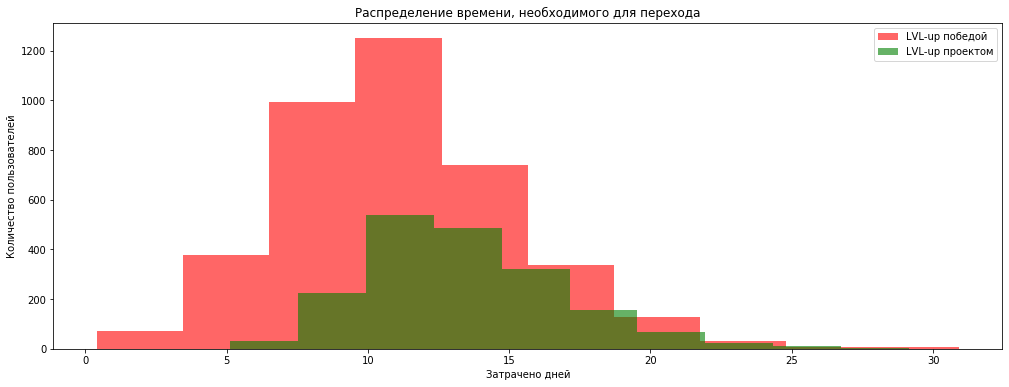

In [83]:
plt.figure(figsize=(17,6))

plt.hist(victory['duration'],alpha = 0.6, color = 'red', label = 'LVL-up победой')
plt.hist(project['duration'],alpha = 0.6, color = 'green', label = 'LVL-up проектом')

plt.title('Распределение времени, необходимого для перехода')
plt.xlabel('Затрачено дней')
plt.ylabel('Количество пользователей')

plt.legend(loc='upper right')

plt.show()

---
- Основная масса людей, прошедших победой, тратит от 7 до 15 дней
- Большая часть, прошедших постройкой проекта, тратят от 10 до 17 дней
- Именно из-за меньшей длительности люди предпочитают проходить уровень победой
___

In [58]:
build_ad = events['building_type'].value_counts().reset_index()

In [59]:
build_ad

,index,building_type
0,spaceport,59325
1,assembly_shop,54494
2,research_center,14137


In [60]:
build_ad['cost_v'] = ad_costs['cost'].sum() / build_ad['building_type'] 
build_ad['cost_v_2'] = build_ad['cost_v'] * 2
build_ad['cost_v_3'] = build_ad['cost_v'] * 3

In [61]:
build_ad

,index,building_type,cost_v,cost_v_2,cost_v_3
0,spaceport,59325,0.128168,0.256336,0.384505
1,assembly_shop,54494,0.139531,0.279061,0.418592
2,research_center,14137,0.537849,1.075699,1.613548


---
Таблица показывает, сколько будет стоить реклама, если показывать ее при каждом строительстве, каждый второй и каждый третий раз. Стоит заметить, что расчет подразумевает только окупаемость рекламных затрат.
___

In [62]:
ad_cpu = ad_costs.groupby('source')['cost'].sum().reset_index().merge(user_source.groupby('source')['user_id'].count().reset_index())
ad_cpu['cpu'] = ad_cpu['cost'] / ad_cpu['user_id']
ad_cpu

,source,cost,user_id,cpu
0,facebook_ads,2140.904643,2726,0.785365
1,instagram_new_adverts,2161.441691,3347,0.645785
2,yandex_direct,2233.111449,4817,0.463590
3,youtube_channel_reklama,1068.119204,2686,0.397662


In [63]:
yandex = user_source.query('source == "yandex_direct"')['user_id']
instagram = user_source.query('source == "instagram_new_adverts"')['user_id']
facebook = user_source.query('source == "facebook_ads"')['user_id']
youtube = user_source.query('source == "youtube_channel_reklama"')['user_id']

In [64]:
yandex.name = 'yandex'
instagram.name = 'instagram'
facebook.name = 'facebook'
youtube.name = 'youtube'

In [65]:
def source_hist(source):
    """
    Функция построения распределения количества событий на пользователя конкретного источника
    
    Принимает набор user_id источника, строит гистограмму распределения
    
    """
    plt.figure(figsize=(17,6))

    plt.hist(victory.query('user_id in @source').groupby('user_id')['event'].count(),alpha = 0.6, color = 'red', label = 'LVL-up победой')
    plt.hist(project.query('user_id in @source').groupby('user_id')['event'].count(),alpha = 0.6, color = 'green', label = 'LVL-up проектом')
    plt.hist(not_fin.query('user_id in @source').groupby('user_id')['event'].count(),alpha = 0.6, color = 'blue', label = 'LVL-up не произошел')

    plt.title('Распределение количества событый на пользователя источника {}'.format(source.name))
    plt.xlabel('Количество событий')
    plt.ylabel('Количество пользователей')
    plt.legend(loc='upper right')

    plt.show()

In [66]:
def souce_dur(source):
    """
    Функция построения распределения времени, необходимого для перехода на следующий уровень
    
    Принимает набор user_id источника, строит гистограмму распределения
    
    """
    plt.figure(figsize=(17,6))

    plt.hist(victory.query('user_id in @source')['duration'],alpha = 0.6, color = 'red', label = 'LVL-up победой')
    plt.hist(project.query('user_id in @source')['duration'],alpha = 0.6, color = 'green', label = 'LVL-up проектом')


    plt.title('Распределение времени, нелбходимого для перехода для пользователя источника {}'.format(source.name))
    plt.xlabel('Затрачено дней')
    plt.ylabel('Количество пользователей')
    plt.legend(loc='upper right')

    plt.show()

In [67]:
def source_review(source):
    """
    Функция подсчета долей различных путей прохождения
    
    Принимает набор user_id источника, подсчитывает количество пользователей и доли относительно источника
    
    """   
    len_all = len(events['user_id'].unique())
    len_s = len(events.query('user_id in @source')['user_id'].unique())
    
    len_v = len(victory.query('user_id in @source')['user_id'].unique())
    len_p = len(project.query('user_id in @source')['user_id'].unique())
    len_nf = len(not_fin.query('user_id in @source')['user_id'].unique())
    
    print('Всего пользователей из источника {}: {}, это {:.2%} от всех пользователей'.format(source.name, len_s, len_s / len_all))
    print('Пользователей, завершивших уровень победой: {}, это {:.2%} от пользователей источника'.format(len_v,len_v / len_s))
    print('Пользователей, завершивших уровень проектом: {}, это {:.2%} от пользователей источника'.format(len_p,len_p / len_s))
    print('Пользователей, не завершивших уровень: {}, это {:.2%} от пользователей источника'.format(len_nf,len_nf / len_s))

In [68]:
def source_analysis(source):
    """
    Запускает анализ источника 
    
    Принимает набор user_id источника, передает его в три функции
    Если что-то можно автоматизировать - автоматизируй это)
    
    """
    source_hist(source)
    souce_dur(source)
    source_review(source)

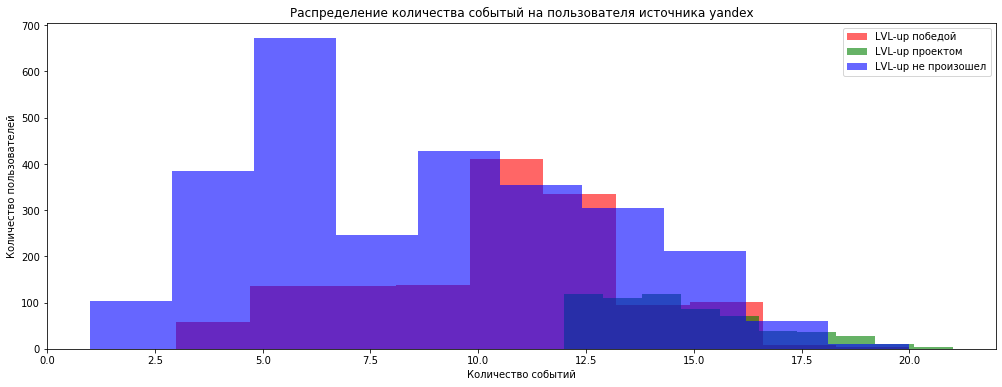

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


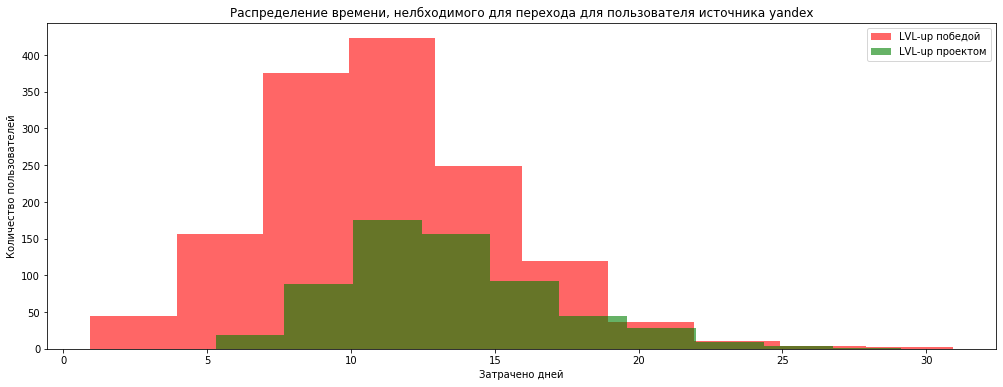

Всего пользователей из источника yandex: 4817, это 35.48% от всех пользователей
Пользователей, завершивших уровень победой: 1422, это 29.52% от пользователей источника
Пользователей, завершивших уровень проектом: 620, это 12.87% от пользователей источника
Пользователей, не завершивших уровень: 2775, это 57.61% от пользователей источника


In [69]:
source_analysis(yandex)

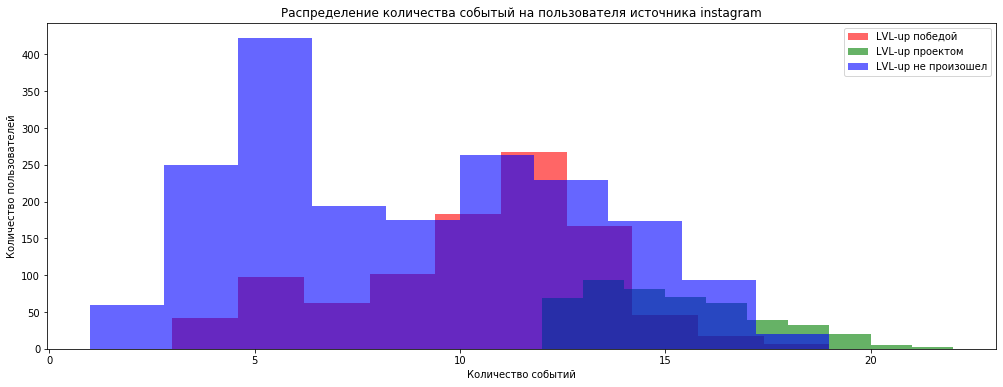

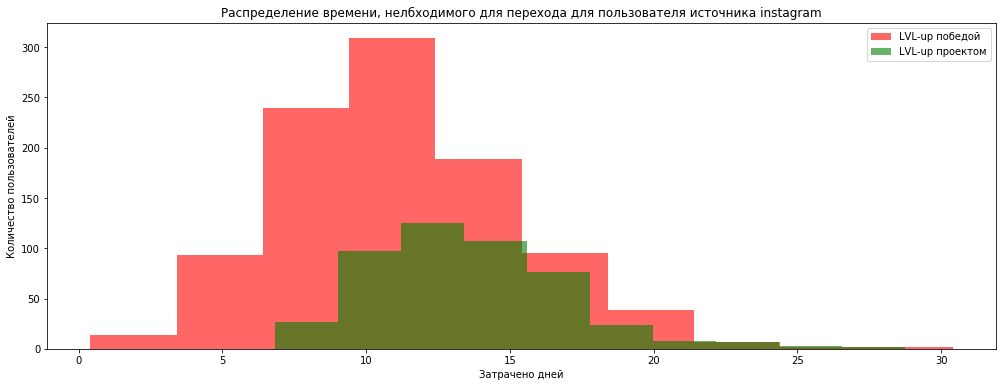

Всего пользователей из источника instagram: 3347, это 24.65% от всех пользователей
Пользователей, завершивших уровень победой: 990, это 29.58% от пользователей источника
Пользователей, завершивших уровень проектом: 476, это 14.22% от пользователей источника
Пользователей, не завершивших уровень: 1881, это 56.20% от пользователей источника


In [70]:
source_analysis(instagram)

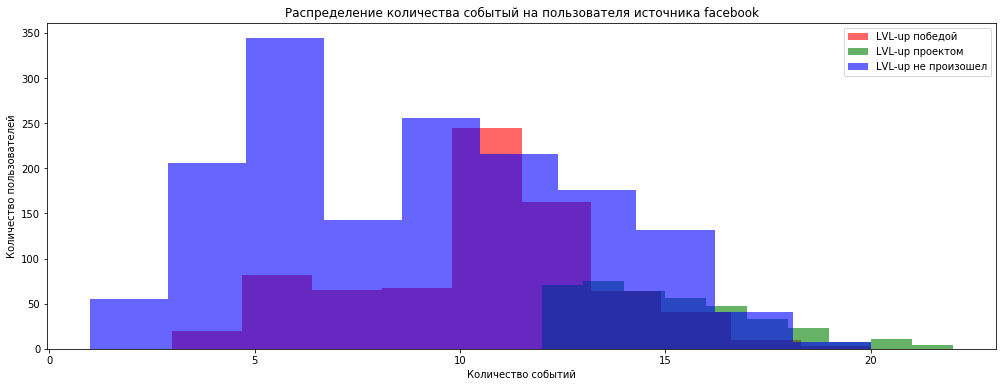

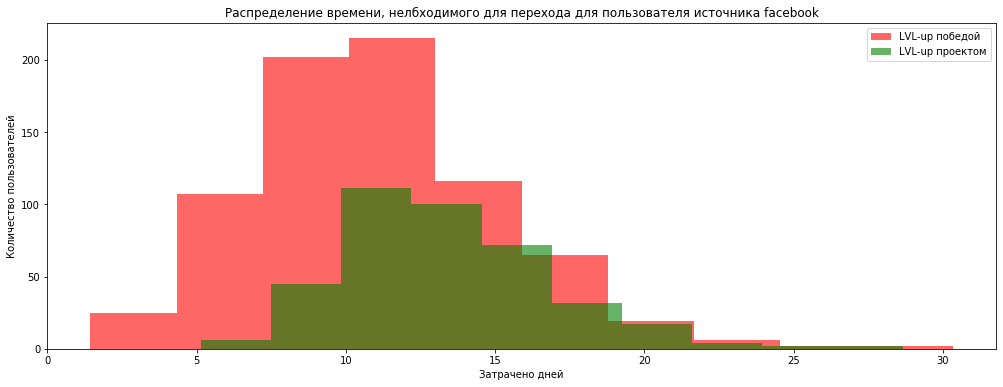

Всего пользователей из источника facebook: 2726, это 20.08% от всех пользователей
Пользователей, завершивших уровень победой: 759, это 27.84% от пользователей источника
Пользователей, завершивших уровень проектом: 391, это 14.34% от пользователей источника
Пользователей, не завершивших уровень: 1576, это 57.81% от пользователей источника


In [71]:
source_analysis(facebook)

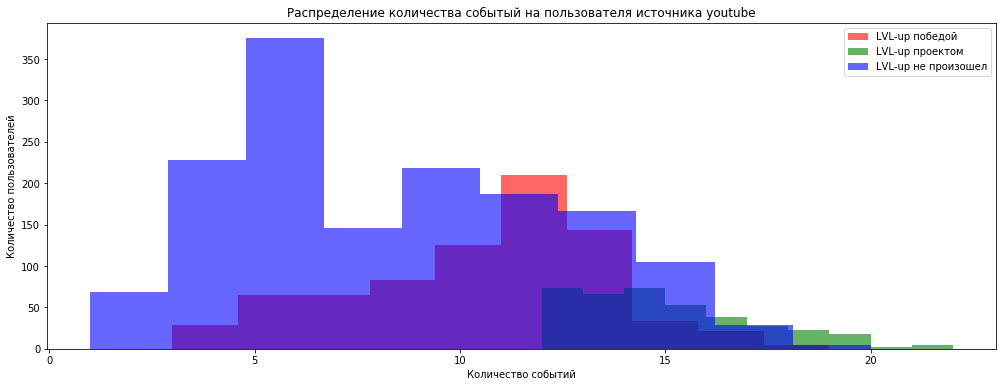

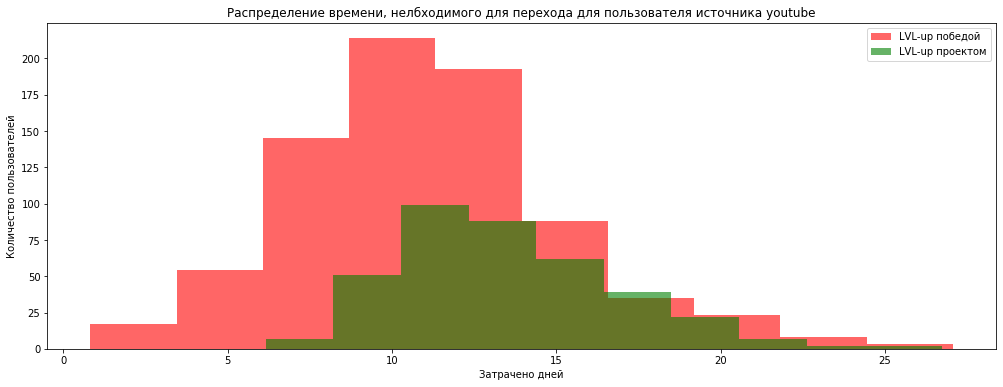

Всего пользователей из источника youtube: 2686, это 19.78% от всех пользователей
Пользователей, завершивших уровень победой: 780, это 29.04% от пользователей источника
Пользователей, завершивших уровень проектом: 379, это 14.11% от пользователей источника
Пользователей, не завершивших уровень: 1527, это 56.85% от пользователей источника


In [72]:
source_analysis(youtube)

In [73]:
ad_cpu

,source,cost,user_id,cpu
0,facebook_ads,2140.904643,2726,0.785365
1,instagram_new_adverts,2161.441691,3347,0.645785
2,yandex_direct,2233.111449,4817,0.463590
3,youtube_channel_reklama,1068.119204,2686,0.397662


- Пользователи, пришедшие от Яндекса, завершают проект быстрее всех - за 12 дней и 19 часов
- Пользователи, пришедшие от Ютуба, завершают проект медленнее все - за 13 дней и 2 часа
- Для пользователей, завершивших уровень победой, разница в продолжительности незначительна
- Пользователи, выбравшие проект, строят практически одинаковое количество зданий
- Для пользователей, завершивших уровень победой, разница в количестве построек также незначительна
- Различий между пользователями различных источников слишком мало, не стоит переплачивать в 2 раза, необходимо сконцентрироваться на рекламе от Яндекса и Ютуба

## Проверка гипотез
___

Нулевая гипотеза: Затраты времени на прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком схожи

Альтернативная гипотеза: Затраты времени на прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком отличны

In [74]:
alpha = .025

In [75]:
results = st.ttest_ind(victory['duration'], project['duration'], equal_var = False, nan_policy='omit')
p_value = results.pvalue

print('p-значение:', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.708058235071042e-107
Отвергаем нулевую гипотезу


In [76]:
victory['duration'].mean()

11.104445326194925

In [77]:
project['duration'].mean()

13.458902026021205

---
- Тест показал, что затраты времени различны
- Можем видеть, что разница в средних затратах ~56 часов
___

Нулевая гипотеза: Количество построек между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком схожи

Альтернативная гипотеза: Количество построек между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком отличны

In [78]:
victory_с = victory.groupby('user_id').agg({'building_type':'count'})
project_с = project.groupby('user_id').agg({'building_type':'count'})

In [79]:
results = st.ttest_ind(victory_с['building_type'], project_с['building_type'], equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


In [80]:
victory_с.mean().reset_index()

,index,0
0,building_type,9.411541


In [81]:
project_с.mean().reset_index()

,index,0
0,building_type,12.64791


---
- Тест показал, что количество строение различно
- Можем видеть, что разница в количестве построек ~3,2
___

## Выводы
___

### Общая характеристика активности пользователей
___
- Количество уникальных пользователей, совершивших хоть одно событие: 13576
- Временные рамки: от 2020-05-04 00:00:01 до 2020-06-05 12:32:49
- Наибольшая активность наблюдается c 5 по 10 мая, это период старта когорты, дальше активность сильно падает, это связанно с завершением уровня и потерей интереса пользователей
- Всего зданий построенно: 127956
- Завершенно первых уровней: 5817
- Проектов реализованно: 1866
- Распределение по популярности зданий:
    - Космопорт: 59325
    - Сборочный цех: 54494
    - Исследовательский центр: 14137
- Основная масса людей, прошедших победой, тратит от 7 до 15 дней
- Большая часть, прошедших постройкой проекта, тратят от 10 до 17 дней
- Именно из-за меньшей длительности люди предпочитают проходить уровень победой
- Большинство пользователей не перешли на следующий уровень
- Перешедшие реализацией проекта, строят больше зданий, но самих пользователей мало
- Переход победой популярнее, но пользователи строят меньше

### Выводы по источникам трафика
___
- Имеем четыре источника трифика
- Рекламная акция длилась неделю
- С каждым днем стоимость кликов уменьшалась для каждого из источников, вплоть до разницы в 22.6 раз
- Среди источников выделяется Ютуб, ведь на него было потрачено в 2 раза меньше, чем на любой другой источник
- Максимальный прирост получили от Яндекс.Директ
- Самымы выгодным источником является Ютуб, а самым бесполезным - Фейсбук
- Значимых различий между пользователями в зависимости от источника нет
- Стоимость рекламы в Инстаграме и Фейсбуке сильно завышены
- Если сделать упор на Яндекс.Директ и Ютуб, наши затраты уменьшаться в 1,5-2 раза, в зависимости от распределения бюджета между ними

### Итоги проверки гипотез о различиях между игроками:
___
- Затраты времени на прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком отличны
- Количество построек между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком отличны


## Рекомендации
___

- Маркетологам стоит принять решение насчет частоты показа рекламы
- Стоит поработать над популярностью прохождения реализацией проекта, ведь эти пользователи больше проводят времени на уровне и строят больше зданий
- Рекомендовал бы отказаться от рекламы в Фейсбуке и сделать упор на Яндекс.Директ и Ютуб